In [ ]:
'''
This script allows for evaluation of cancer cell line specific models by using CRISPR-ko
data from Cell Model Passports (https://cellmodelpassports.sanger.ac.uk/downloads, accessed 11/01/2025).
'''

In [1]:
# imports
import pathlib
import os
import pandas as pd
import cobra
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
# Inputs

# cell line name:
cell_line = "A375"

# models identifier:
prefix = "A375_ftINIT"

# get data & model folders
current_dir = pathlib.Path(os.getcwd())
data_dir = current_dir.parent / "datasets" / "validation" / "crispr_ko_fitness_scores" / "Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_scaled_bayesian_factors_20240111.tsv"
model_dir = current_dir.parent / "models"
output_dir = current_dir / "validation_data"

In [4]:
# read in CRISPR-ko gene essentiality data (as bayesian factor)
df_essentiality = pd.read_csv(data_dir, delimiter="\t")
df_essentiality

C:\Users\phili\AppData\Local\Temp\ipykernel_18736\2812147567.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,model_name,WERI-RB-1,OVCAR-8,UM-UC-10,PE-CA-PJ15,NCI-H1793,SCMC-RM2,SW620,THUR14TKB,Calu-6,...,ORL-153,ORL-156,ORL-174,ORL-204,ORL-207,ORL-214,ORL-215,ORL-166,ORL-188,ORL-195
0,model_id,SIDM01414,SIDM00090,SIDM01408,SIDM00473,SIDM00755,SIDM01346,SIDM00841,SIDM01433,SIDM00921,...,SIDM02004,SIDM02003,SIDM02001,SIDM02008,SIDM01998,SIDM01996,SIDM01995,SIDM02002,SIDM02000,SIDM01999
1,source,Broad,Broad,Broad,Broad,Broad,Broad,Broad,Broad,Broad,...,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger
2,qc_pass,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHOC2,-3.45570529200326,1.88544949469464,-1.94161825611376,-1.27869832443033,5.74272213813296,-4.51923805832449,-3.81814132028981,-0.421799270345261,8.63698780324773,...,-0.763075520769502,3.18571823210814,-3.07430070642396,-1.67088556718678,-1.14335342911102,0.894606442289606,-2.05276166014483,5.54165317608197,-0.0571466292340781,-1.20791108360032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,S1PR3,-3.790089,-3.921607,-3.215208,-2.461284,-2.430741,-1.102245,-4.451356,-0.43097,-5.003743,...,-4.086966,-2.287907,-2.041621,-4.026538,-3.387773,-1.91954,-2.072177,-3.911306,-1.0492,-2.979551
17647,MYO18A,-0.693412,-0.330508,-3.711787,-1.184783,-2.397106,-4.454032,-0.849055,1.505925,-3.504593,...,-3.348726,-3.353174,-2.598972,-5.442261,-2.279649,-2.704107,-0.855329,-4.402431,-3.377708,-3.580592
17648,BTBD8,-3.508989,1.066084,0.191926,-3.294024,-4.47516,-3.779716,-0.370703,-0.063434,-4.552251,...,-5.800755,-3.110906,-1.900222,-6.070746,-3.594431,-2.696693,-1.641518,-5.385457,-5.636214,-4.116743
17649,BHLHE40,-4.005939,-5.547557,-3.312595,-4.537628,-6.182246,-2.810634,-1.138533,-3.217604,-3.838259,...,-4.021079,-4.150235,-4.88336,-7.063133,-4.963023,-4.475002,-5.631364,-7.919535,-5.525772,-4.27305


In [5]:
# filter for cell line data
df_model_essentiality = df_essentiality.loc[4:, ["model_name", cell_line]].rename(columns={"model_name": "gene_symbol", cell_line: "gene_essentiality"})
df_model_essentiality

,gene_symbol,gene_essentiality
4,SHOC2,-3.91934351358383
5,NDUFA12,-0.524228577153346
6,SDAD1,7.01954937728159
7,FAM98A,-3.1819996964536
8,ZNF253,-0.0948737071231989
...,...,...
17646,S1PR3,-3.507501
17647,MYO18A,-0.423597
17648,BTBD8,-3.254201
17649,BHLHE40,-4.387341


In [6]:
# get gene-symbol mapping from Human-GEM
gene_symbol_ihuman = {
    "gene_id": [],
    "gene_symbol": [],
    "reaction": []
}
with cobra.io.read_sbml_model(model_dir / "Human-GEM.xml") as ihuman:
    for gene in ihuman.genes:
        gene_symbol_ihuman["gene_id"].append(gene.id)
        gene_symbol_ihuman["gene_symbol"].append(gene.annotation["hgnc.symbol"])
        reactions = gene.reactions
        if isinstance(reactions, frozenset):
            gene_symbol_ihuman["reaction"].append([reaction.id for reaction in reactions])
        else:
            gene_symbol_ihuman["reaction"].append([reactions.id])
print(gene_symbol_ihuman)


{'gene_id': ['ENSG00000000419', 'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001630', 'ENSG00000002549', 'ENSG00000002587', 'ENSG00000002726', 'ENSG00000002746', 'ENSG00000003137', 'ENSG00000003987', 'ENSG00000003989', 'ENSG00000004455', 'ENSG00000004468', 'ENSG00000004478', 'ENSG00000004779', 'ENSG00000004799', 'ENSG00000004809', 'ENSG00000004864', 'ENSG00000004939', 'ENSG00000004961', 'ENSG00000005022', 'ENSG00000005075', 'ENSG00000005187', 'ENSG00000005339', 'ENSG00000005381', 'ENSG00000005421', 'ENSG00000005469', 'ENSG00000005471', 'ENSG00000005810', 'ENSG00000005882', 'ENSG00000006007', 'ENSG00000006071', 'ENSG00000006530', 'ENSG00000006534', 'ENSG00000006625', 'ENSG00000006695', 'ENSG00000006756', 'ENSG00000006757', 'ENSG00000007001', 'ENSG00000007168', 'ENSG00000007171', 'ENSG00000007216', 'ENSG00000007314', 'ENSG00000007350', 'ENSG00000007541', 'ENSG00000007933', 'ENSG00000007944', 'ENSG00000008130', 'ENSG00000008311', 'ENSG00000008394', 'ENSG00000008438', 'ENSG00000008513',

In [7]:
# check how many genes that are in Human-GEM are represented in the gene essentiality data
cnt = 0
ihuman_symbols = gene_symbol_ihuman["gene_symbol"]
print(f"Number of genes in Human-GEM with annotated symbol: {len(ihuman_symbols)}")
for symbol in df_model_essentiality["gene_symbol"]:
    if symbol in ihuman_symbols:
        cnt += 1 
print(f"Number of these gene symbols included in the crsipr ko screening: {cnt}")

Number of genes in Human-GEM with annotated symbol: 2887
Number of these gene symbols included in the crsipr ko screening: 2796


In [8]:
# filter gene essentiality data for genes present in Human-GEM
# & map gene symbols 
df_ihuman_genes_symbols = pd.DataFrame(gene_symbol_ihuman)
df_essentiality = df_ihuman_genes_symbols.join(
    df_model_essentiality.set_index(df_model_essentiality.columns[0]), 
    how="inner", 
    on="gene_symbol"
    )
df_essentiality
df_essentiality["gene_essentiality"] = df_essentiality["gene_essentiality"].astype(float)

In [9]:
# finding all relevant ftINIT models
mdl_list = ["Human-GEM"] # for comparison
for file in model_dir.iterdir():
    if file.name.startswith(prefix) and (file.suffix == ".mat"):
        mdl_name = file.stem
        mdl_list.append(mdl_name)
n = len(mdl_list)
print(f"{n} ftINIT models found:")
print(mdl_list)

27 ftINIT models found:
['Human-GEM', 'A375_ftINIT_1+0_thr010_model', 'A375_ftINIT_1+0_thr025_model', 'A375_ftINIT_1+0_thr050_model', 'A375_ftINIT_1+0_thr075_model', 'A375_ftINIT_1+0_thr100_model', 'A375_ftINIT_1+0_thr125_model', 'A375_ftINIT_1+0_thr150_model', 'A375_ftINIT_1+0_thr175_model', 'A375_ftINIT_1+0_thr200_model', 'A375_ftINIT_1+0_thr250_model', 'A375_ftINIT_1+0_thr300_model', 'A375_ftINIT_1+0_thr400_model', 'A375_ftINIT_1+0_thr500_model', 'A375_ftINIT_1+1_thr010_model', 'A375_ftINIT_1+1_thr025_model', 'A375_ftINIT_1+1_thr050_model', 'A375_ftINIT_1+1_thr075_model', 'A375_ftINIT_1+1_thr100_model', 'A375_ftINIT_1+1_thr125_model', 'A375_ftINIT_1+1_thr150_model', 'A375_ftINIT_1+1_thr175_model', 'A375_ftINIT_1+1_thr200_model', 'A375_ftINIT_1+1_thr250_model', 'A375_ftINIT_1+1_thr300_model', 'A375_ftINIT_1+1_thr400_model', 'A375_ftINIT_1+1_thr500_model']


In [6]:
# perform single gene knockouts for all genes with CRISPR-ko data for all models
i = 0
for file in model_dir.iterdir():
    if (file.stem in mdl_list) and (file.suffix == ".mat"):
        i += 1
        mdl_name = file.stem
        print()
        print(f"Working on {mdl_name} ({i}/{n})")
        print("*loading model*")
        with cobra.io.load_matlab_model(file) as mdl:
            df_essentiality[f"fba_solution_{mdl_name}"] = np.zeros(len(df_essentiality))
            df_essentiality[f"in_model_{mdl_name}"] = np.zeros(len(df_essentiality)).astype(bool)
            for index in tqdm(df_essentiality.index, desc="*performing in silico knockouts*"):
                gene = df_essentiality.loc[index, "gene_id"]
                with mdl as model:
                    if gene in model.genes:
                        model.genes.get_by_id(gene).knock_out()
                        df_essentiality.loc[index, f"fba_solution_{mdl_name}"] = model.slim_optimize()
                        df_essentiality.loc[index, f"in_model_{mdl_name}"] = True


Working on Human-GEM (1/27)
*loading model*


*performing in silico knockouts*: 100%|██████████| 2796/2796 [04:38<00:00, 10.03it/s]


In [10]:
# save result to not have to reacalculate every time
df_essentiality.to_csv(output_dir / "in_silico_knockouts_A375.tsv", sep="\t")

In [7]:
df_essentiality = pd.read_csv(output_dir / "in_silico_knockouts_A375.tsv", delimiter="\t")

In [12]:
# making a simple and a more detailed confusion matrix for every model
confusion_matrices = {}
for mdl_name in mdl_list:

    sub_df = df_essentiality.loc[df_essentiality[f"in_model_{mdl_name}"] == True, ["gene_essentiality", f"fba_solution_{mdl_name}"]].rename(columns={f"fba_solution_{mdl_name}": "fba_solution"})

    confusion_matrix = pd.DataFrame(
        [
            [
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1) & (sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1) & (sub_df["gene_essentiality"] >= 0)]),
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1)])
            ], 
            [
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] >= 0)]),
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1)])
            ], 
            [
                len(sub_df.loc[(sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["gene_essentiality"] >= 0)]),
                len(sub_df)
            ]
        ],
        index=pd.Index(["growth", "no growth", "total"], name="FBA result"),
        columns=pd.Index(["not essential", "essential", "total"], name="gene essentiality")
    )
    confusion_matrices[mdl_name] = confusion_matrix


    

In [14]:
from scipy.stats import chi2
from math import sqrt

# calculate accuracy and F1-score for all models for easy comparison
df_model_predictive_capability = pd.DataFrame(
    index = mdl_list,
)
for mdl_name in mdl_list:
    cm = confusion_matrices[mdl_name]
    # assigning values for true positive (TP), true negative (TN), false positive (FP) and false negative (FN)
    TP = cm.loc["no growth", "essential"]
    TN = cm.loc["growth", "not essential"]
    FP = cm.loc["no growth", "not essential"]
    FN = cm.loc["growth", "essential"]

    # accuracy
    df_model_predictive_capability.loc[mdl_name, "Accuracy"] = (
        (TP + TN) / 
        (TP + TN + FP + FN)
    )
    
    # precision
    precision = (
        TP / 
        (TP + FP)
    )
    df_model_predictive_capability.loc[mdl_name, "Precision"] = precision

    # recall
    recall = (
        TP / 
        (TP + FN)
    )
    df_model_predictive_capability.loc[mdl_name, "Recall"] = recall
    
    # F1-score
    df_model_predictive_capability.loc[mdl_name, "F1-Score"] = (
            (2 * precision * recall) / 
            (precision + recall)            
    )
    
    # Matthews correlation coefficient (MCC) 
    mcc = (
        ((TP*TN)-(FP*FN)) /
        sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    )
    df_model_predictive_capability.loc[mdl_name, "MCC"] = mcc


    # chi-squared
    # get total values for predicted and emperical gene essentialities
    pred_ess = cm.loc["no growth", "total"]
    pred_non_ess = cm.loc["growth", "total"]
    emp_non_ess = cm.loc["total", "essential"]
    emp_ess = cm.loc["total", "not essential"]
    n = cm.loc["total", "total"]
    # create a matrix as expected if the predictions are made by pure chance 
    exp_TP = pred_ess * emp_ess / n
    exp_TN = pred_non_ess * emp_non_ess / n
    exp_FP = pred_ess * emp_non_ess / n
    exp_FN = pred_non_ess * emp_ess / n
    # calculating value of chi-squared statistic
    chi_squared = (
        ((TP - exp_TP) ** 2) / exp_TP +
        ((TN - exp_TN) ** 2) / exp_TN +
        ((FP - exp_FP) ** 2) / exp_FP +
        ((FN - exp_FN) ** 2) / exp_FN
    )
    print(
        f"""
        TP: {TP}
        exp: {exp_TP}\n
        TN: {TN}
        exp: {exp_TN}\n
        FP: {FP}
        exp: {exp_FP}\n
        FN: {FN}
        exp: {exp_FN}\n
        chi: {chi_squared}
        """
    )
    # degrees of freedom for a 2x2 matrix
    d_f = 1
    #calculating p-value    df_model_predictive_capability.loc[mdl_name, "p-value"] = p_value
    df_model_predictive_capability.loc[mdl_name, "chi^2"] = chi_squared
    p_value = 1 - chi2.cdf(chi_squared, d_f)
    df_model_predictive_capability.loc[mdl_name, "p-value"] = f"{p_value*10000} %"

df_model_predictive_capability


        TP: 73
        exp: 69.35729613733906

        TN: 2215
        exp: 549.3572961373391

        FP: 14
        exp: 17.642703862660944

        FN: 494
        exp: 2159.642703862661

        chi: 6335.787003498297
        

        TP: 75
        exp: 71.54157782515992

        TN: 1871
        exp: 442.5415778251599

        FP: 14
        exp: 17.458422174840084

        FN: 385
        exp: 1813.45842217484

        chi: 5736.898215227567
        

        TP: 75
        exp: 71.54157782515992

        TN: 1871
        exp: 442.5415778251599

        FP: 14
        exp: 17.458422174840084

        FN: 385
        exp: 1813.45842217484

        chi: 5736.898215227567
        

        TP: 75
        exp: 73.95309168443497

        TN: 1868
        exp: 441.953091684435

        FP: 17
        exp: 18.04690831556503

        FN: 385
        exp: 1811.0469083155651

        chi: 5724.382837261774
        

        TP: 75
        exp: 73.95309168443497

        TN: 1868
      

,Accuracy,Precision,Recall,F1-Score,MCC,chi^2,p-value
Human-GEM,0.818312,0.839080,0.128748,0.223242,0.283597,6335.787003,0.0 %
A375_ftINIT_1+0_thr010_model,0.829851,0.842697,0.163043,0.273224,0.323389,5736.898215,0.0 %
A375_ftINIT_1+0_thr025_model,0.829851,0.842697,0.163043,0.273224,0.323389,5736.898215,0.0 %
A375_ftINIT_1+0_thr050_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr075_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr100_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr125_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr150_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr175_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %
A375_ftINIT_1+0_thr200_model,0.828571,0.815217,0.163043,0.271739,0.315029,5724.382837,0.0 %


In [19]:
# save the table as supplementary data
df_model_predictive_capability.to_csv(current_dir.parent / "outputs" / f"{prefix}_model_stats.tsv", sep="\t")

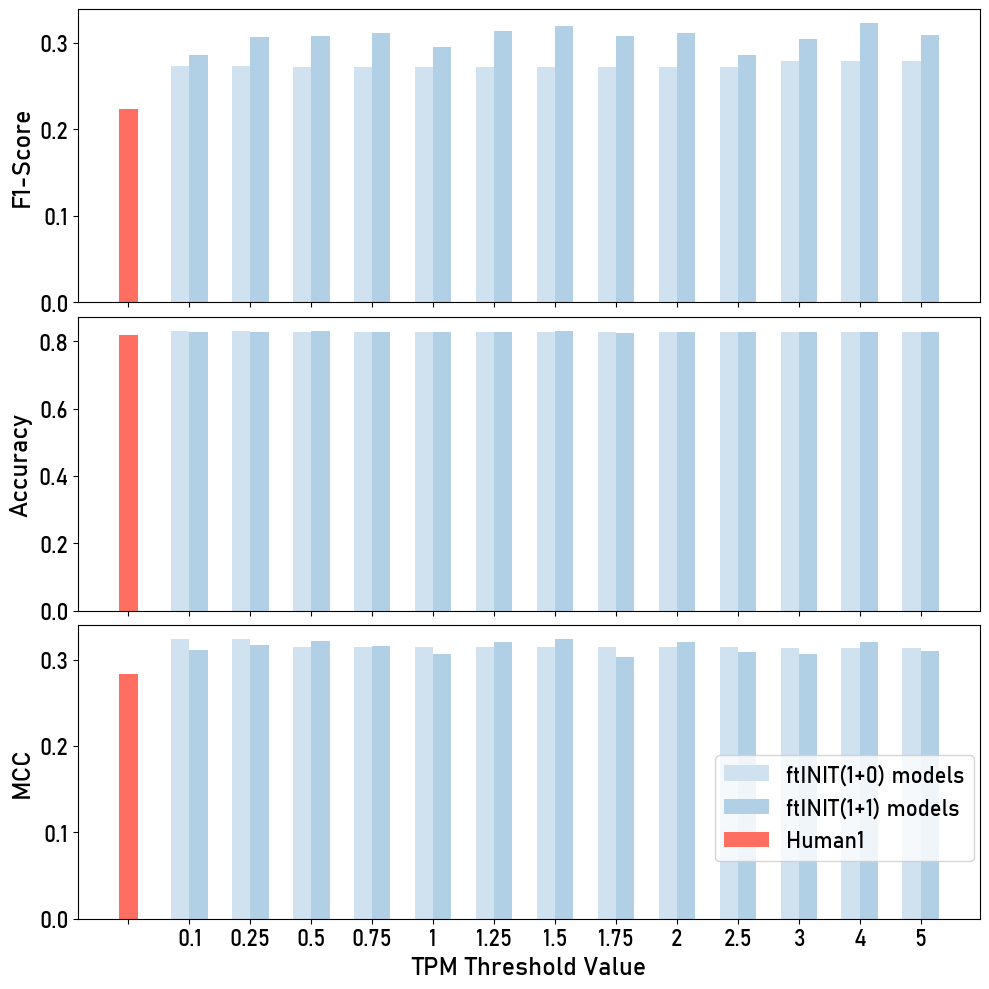

In [18]:
# Extract F1-Score and Accuracy data
F1_10_scores = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("0_thr"), "F1-Score"]
F1_11_scores = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("1_thr"), "F1-Score"]
F1_human1_score = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("Human-GEM"), "F1-Score"]

F1_10_acc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("0_thr"), "Accuracy"]
F1_11_acc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("1_thr"), "Accuracy"]
F1_human1_acc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("Human-GEM"), "Accuracy"]

# Extract MCC data
F1_10_mcc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("0_thr"), "MCC"]
F1_11_mcc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("1_thr"), "MCC"]
F1_human1_mcc = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("Human-GEM"), "MCC"]

# Number of data points
x = np.arange(len(F1_10_scores))  # Create a range for the x-axis positions

# Bar width
bar_width = 0.3

# Set font globally
plt.rcParams['font.family'] = 'Bahnschrift'

# Create the combined plot with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)  # Now three rows

# Plot F1-Scores
axes[0].bar(x - bar_width / 2, F1_10_scores, width=bar_width, label='ftINIT(1+0) models', color="#D0E2F0")
axes[0].bar(x + bar_width / 2, F1_11_scores, width=bar_width, label='ftINIT(1+1) models', color="#B1CFE5")
axes[0].bar(-1, F1_human1_score, width=bar_width, label='Human1', color="#FF6F61")  # Reference value on the left
axes[0].set_ylabel('F1-Score', fontsize=18)
axes[0].tick_params(axis='y', labelsize=16)

# Plot Accuracies
axes[1].bar(x - bar_width / 2, F1_10_acc, width=bar_width, label='ftINIT(1+0) models', color="#D0E2F0")
axes[1].bar(x + bar_width / 2, F1_11_acc, width=bar_width, label='ftINIT(1+1) models', color="#B1CFE5")
axes[1].bar(-1, F1_human1_acc, width=bar_width, label='Human1', color="#FF6F61")  # Reference value on the left
axes[1].set_ylabel('Accuracy', fontsize=18)
axes[1].tick_params(axis='y', labelsize=16)

# Plot MCC values
axes[2].bar(x - bar_width / 2, F1_10_mcc, width=bar_width, label='ftINIT(1+0) models', color="#D0E2F0")
axes[2].bar(x + bar_width / 2, F1_11_mcc, width=bar_width, label='ftINIT(1+1) models', color="#B1CFE5")
axes[2].bar(-1, F1_human1_mcc, width=bar_width, label='Human1', color="#FF6F61")  # Reference value on the left
axes[2].set_ylabel('MCC', fontsize=18)
axes[2].set_xlabel('TPM Threshold Value', fontsize=18)
axes[2].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='x', labelsize=16)
axes[2].set_xticks([-1] + list(x))  # Add an extra tick for the reference point
axes[2].set_xticklabels(['', 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 5])

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()  # Retrieve handles and labels from the first subplot
fig.legend(handles, labels, fontsize=16, loc="upper right", bbox_to_anchor=(0.99, 0.25))  # Position at the top

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Reduce vertical space between subplots

# Save and show the combined plot
plt.savefig(output_dir / "combined_F1_Accuracy_MCC_with_reference_left.svg")
plt.show()


In [ ]:
# save confusion matrices in excel for formatting

output_path = current_dir.parent / "outputs" / f"{prefix}_gene_essentiality_validation.xlsx"

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    for mdl_name, confusion_matrix in confusion_matrices.items():
        if mdl_name == "Human-GEM":
            confusion_matrix.to_excel(writer, sheet_name=f"confusion_{mdl_name}")  
        else:
            mdl_mod = mdl_name.split("_")[2] + "_" + mdl_name.split("_")[3]
            confusion_matrix.to_excel(writer, sheet_name=f"confusion_{mdl_mod}")      

print(f"DataFrames saved to {output_path}")

DataFrames saved to c:\Users\phili\OneDrive - uni-bielefeld.de\Uni\SoSe24\BA\thesis_scripts\outputs\A375_ftINITgene_essentiality_validation.xlsx


C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


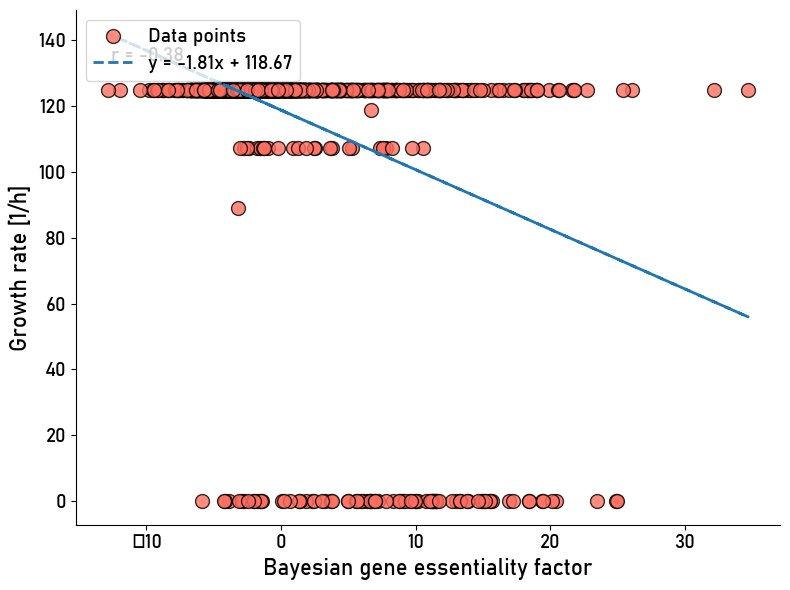

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


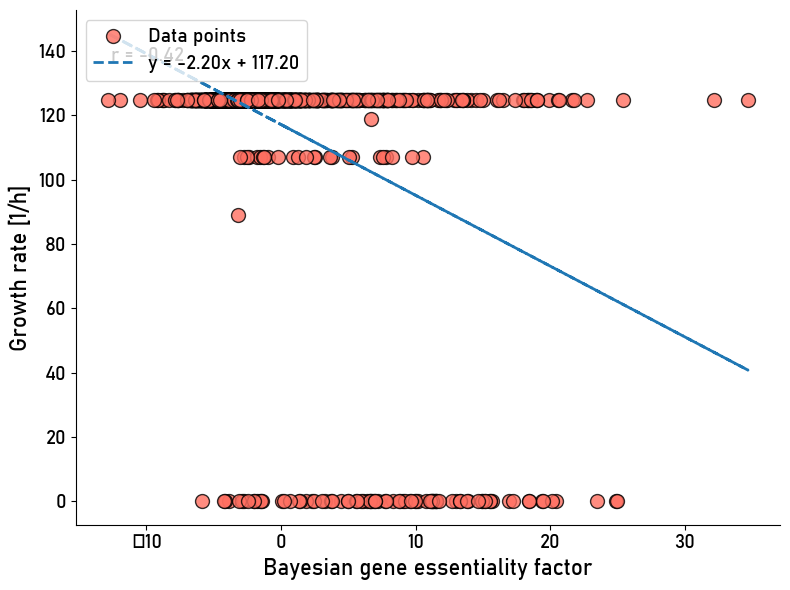

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


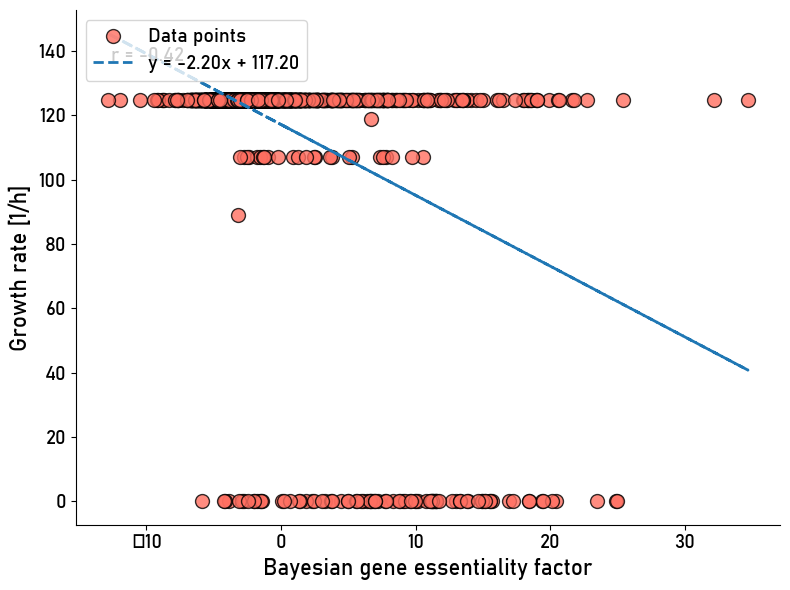

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


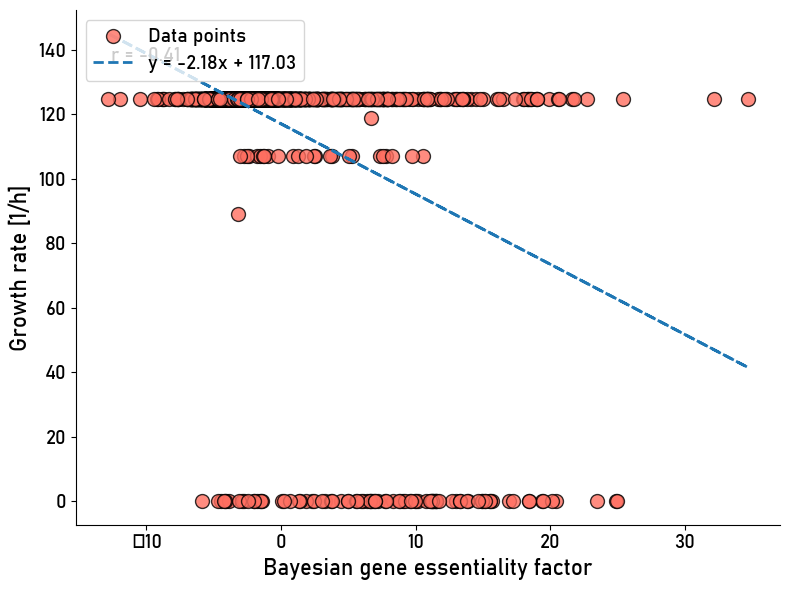

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


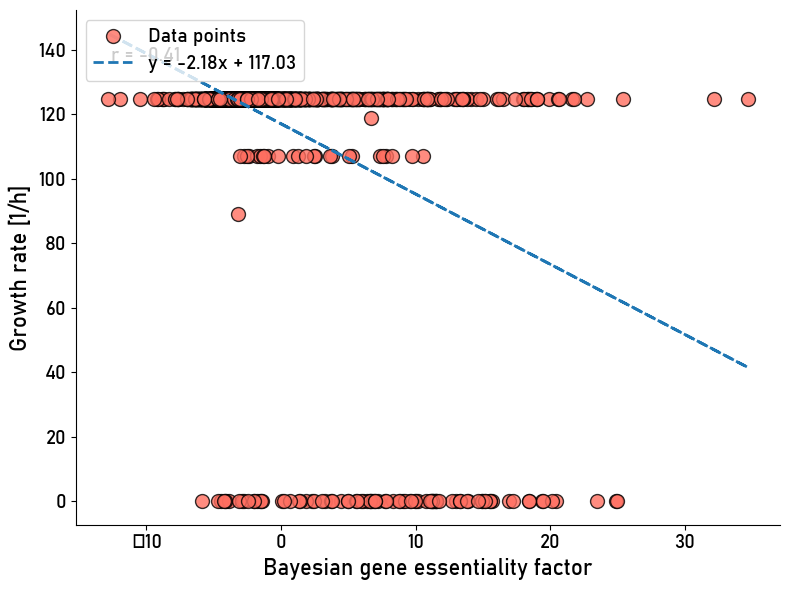

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


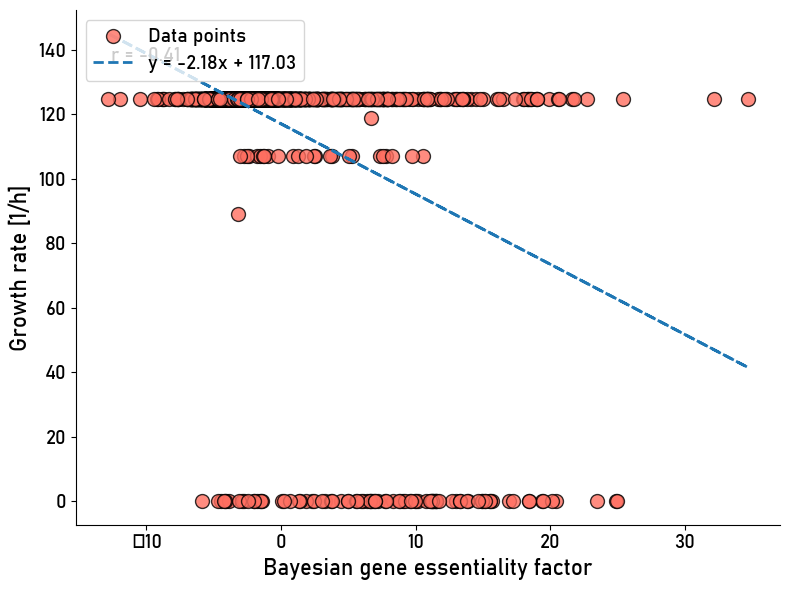

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


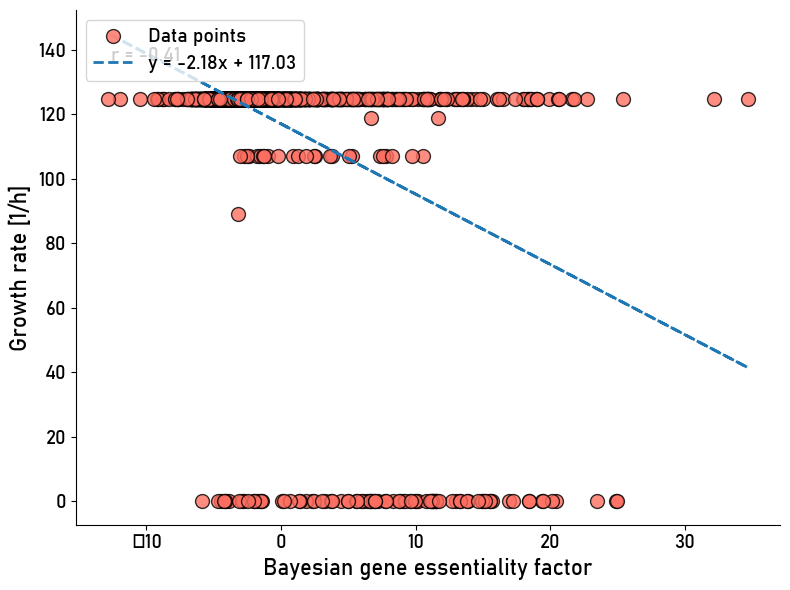

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


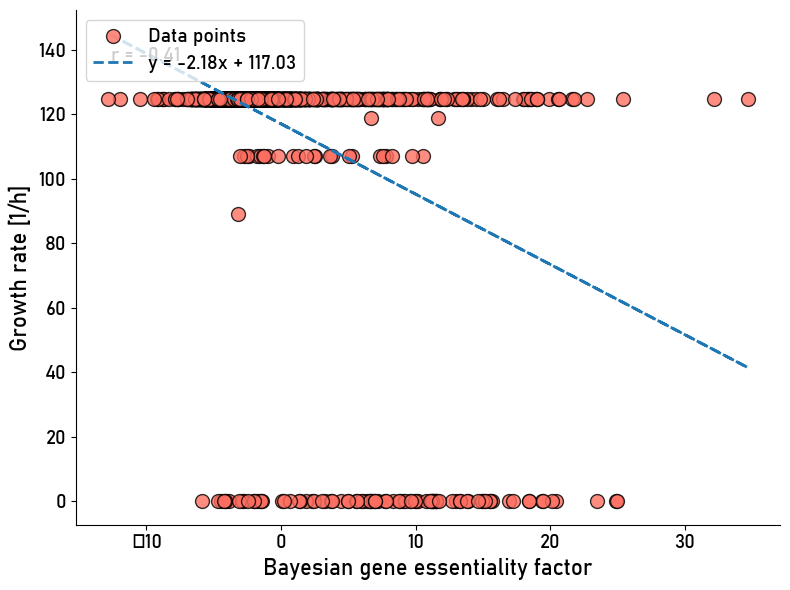

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


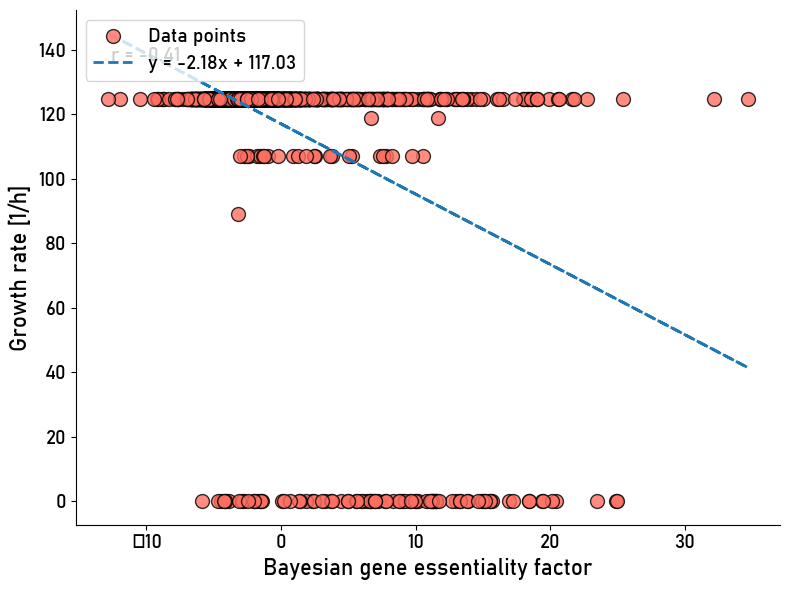

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


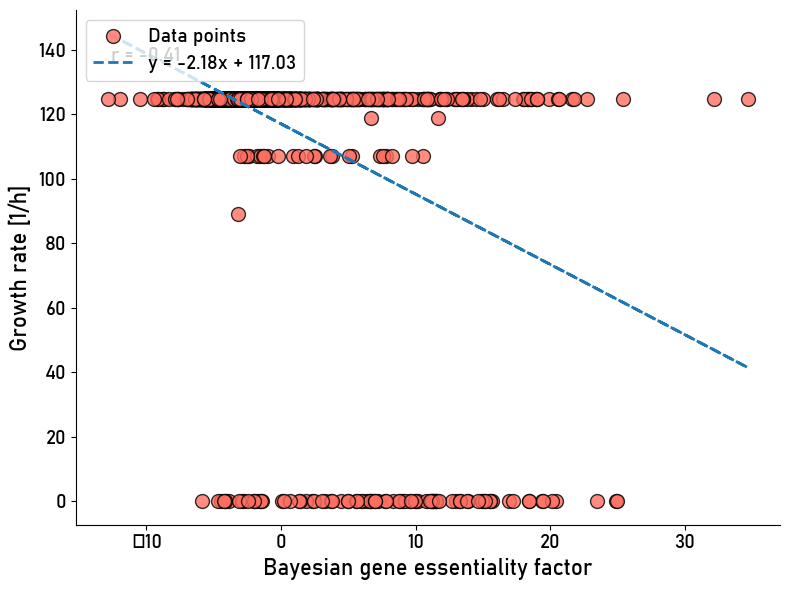

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


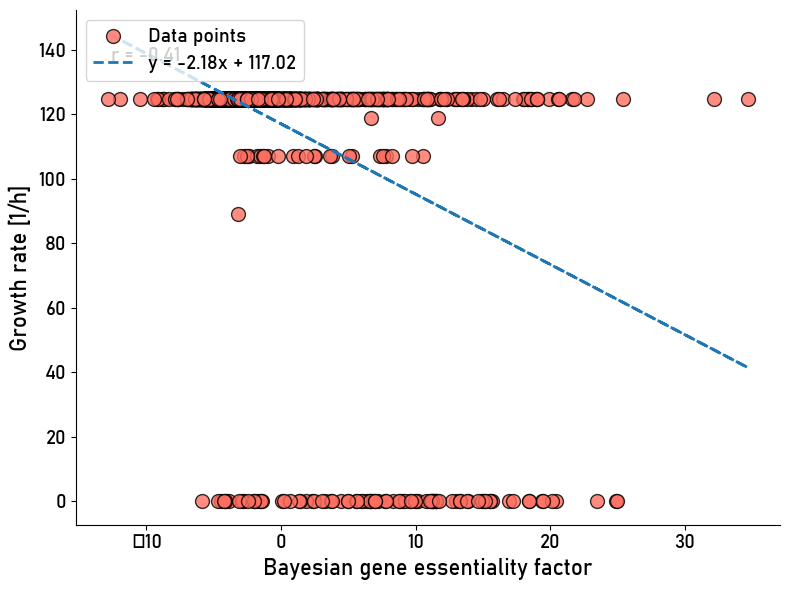

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


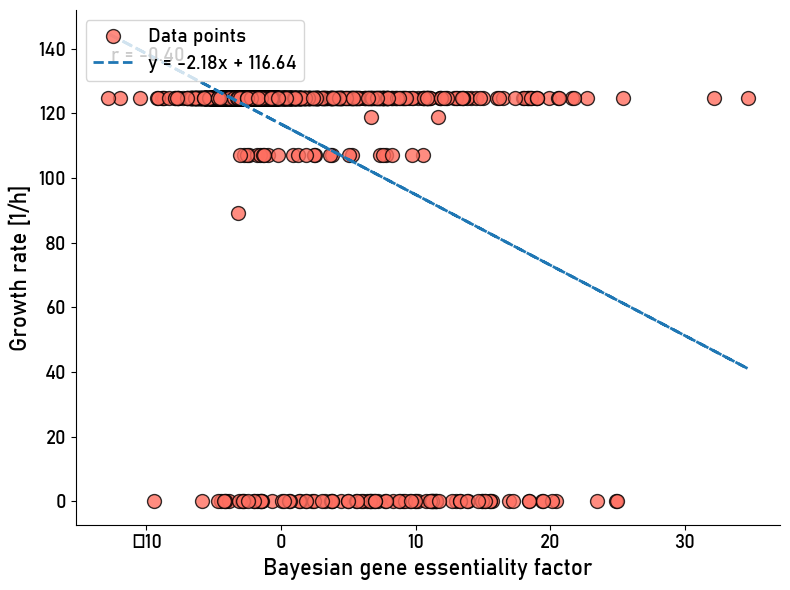

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


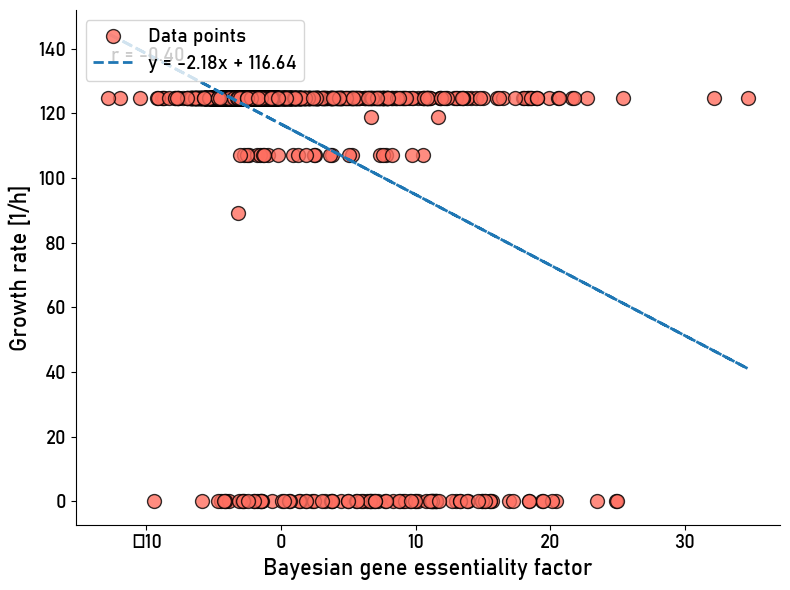

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


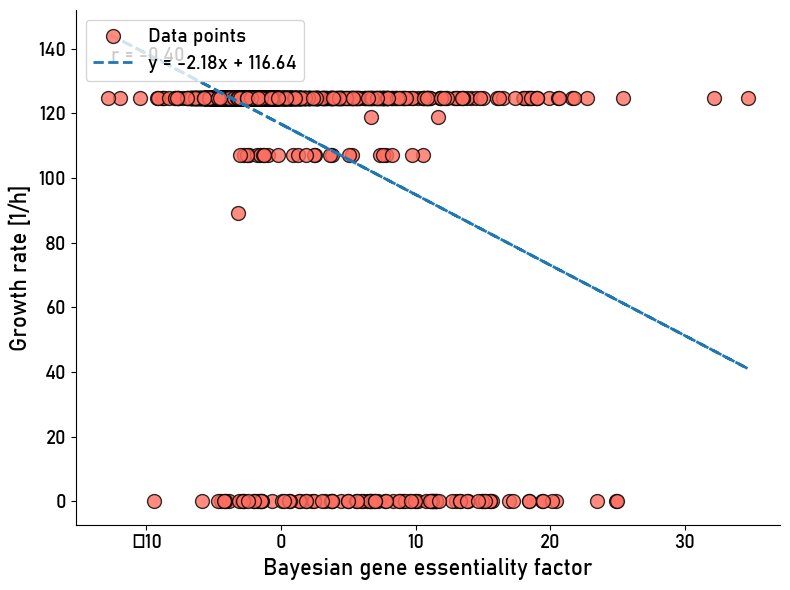

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


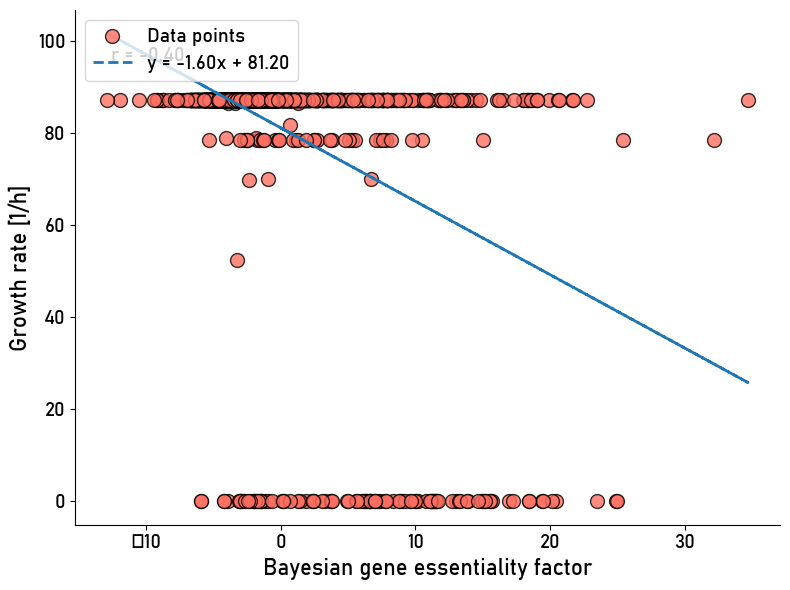

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


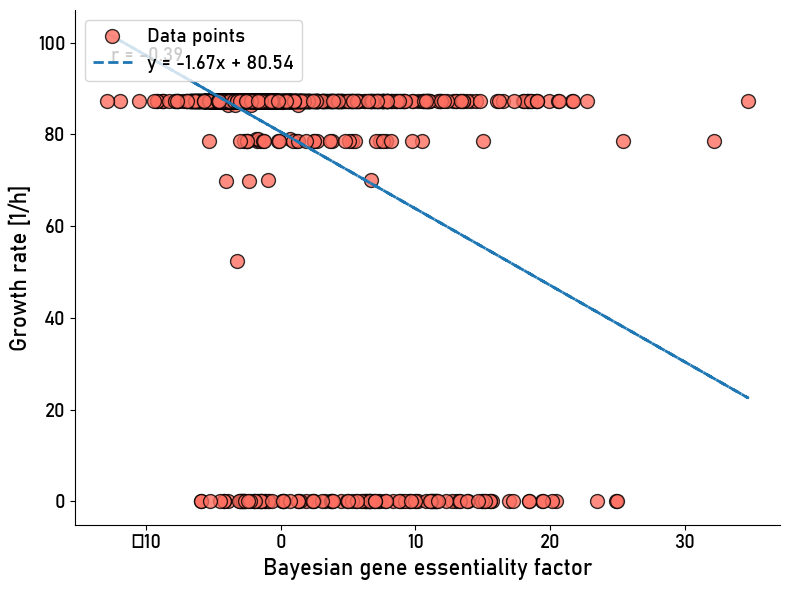

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


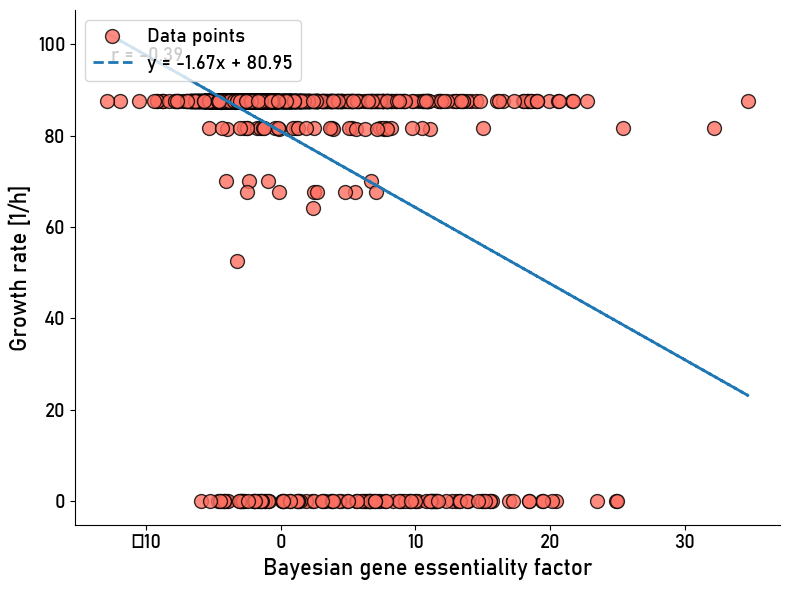

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


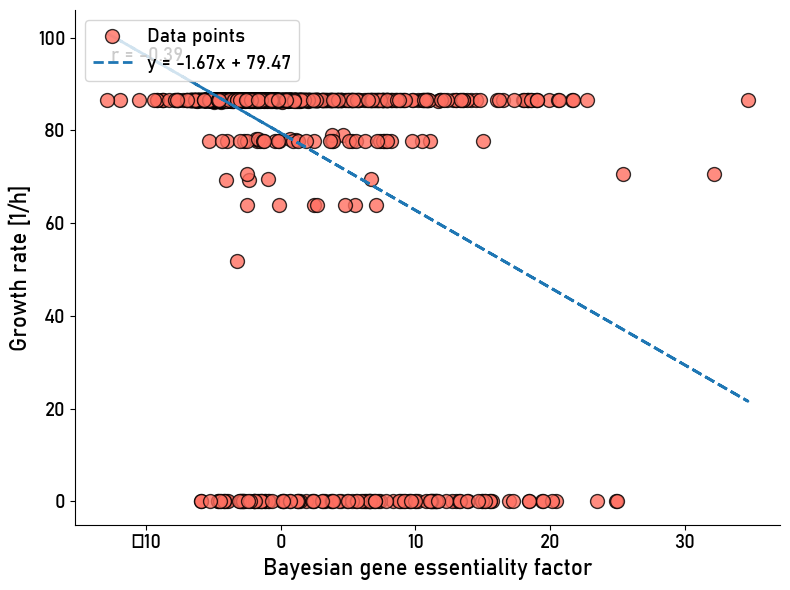

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


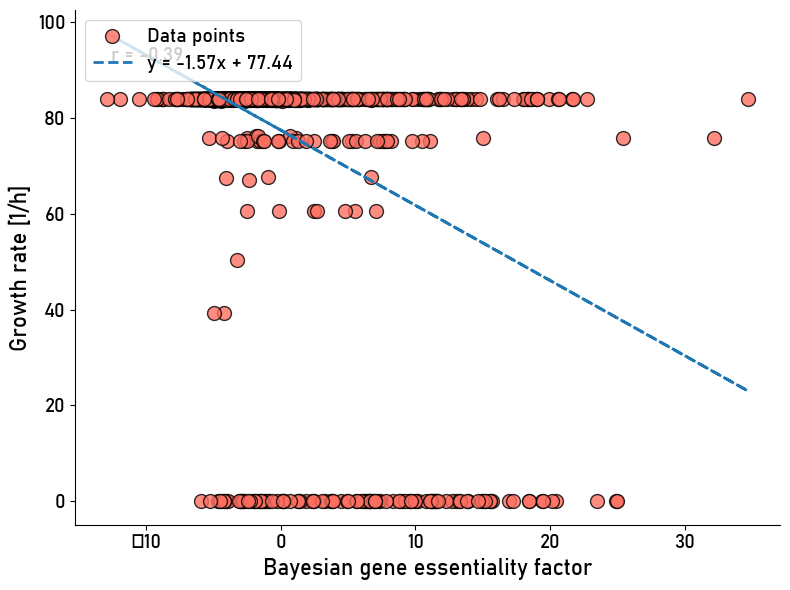

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


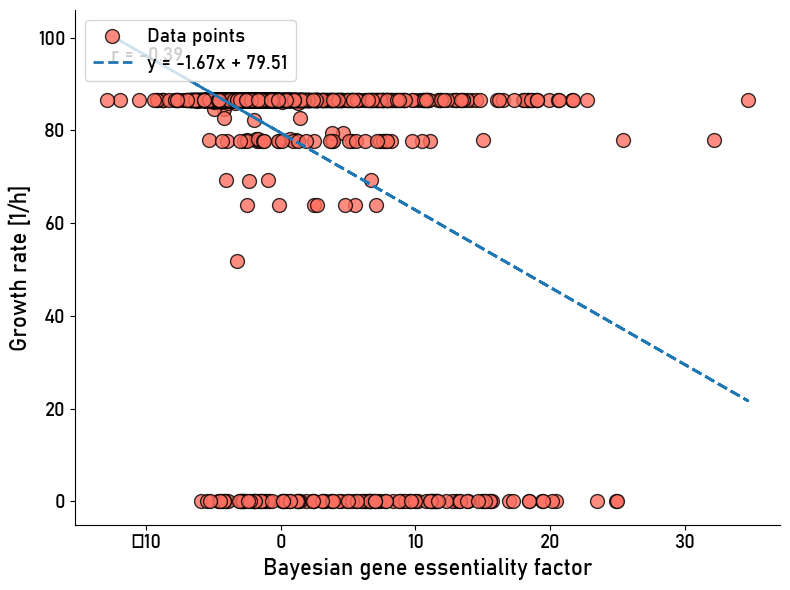

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


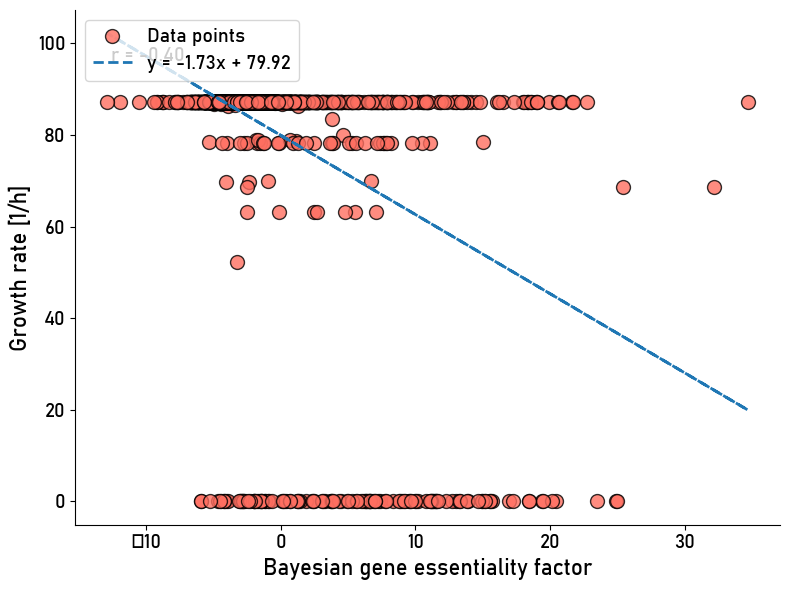

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


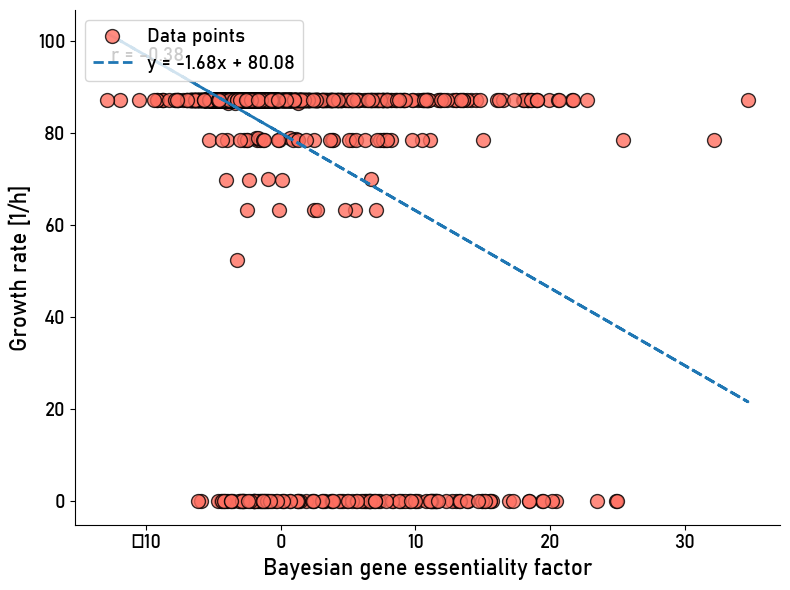

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


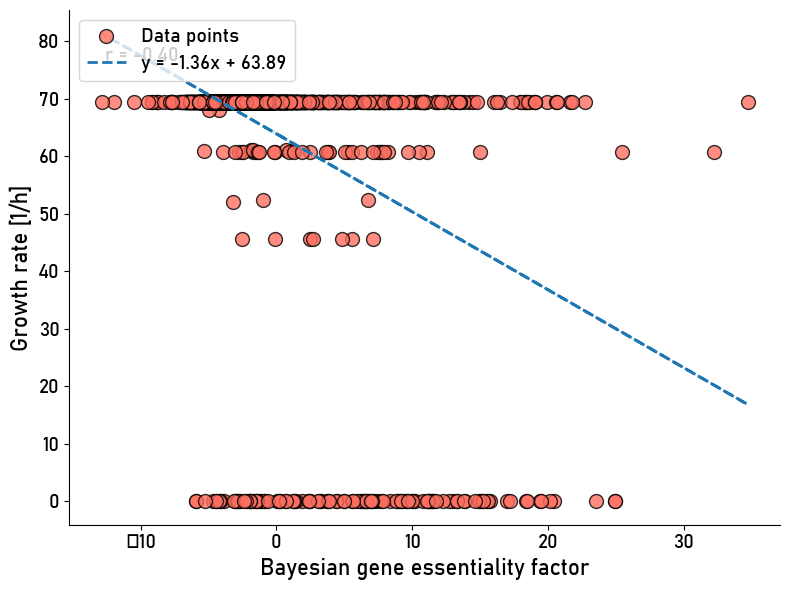

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


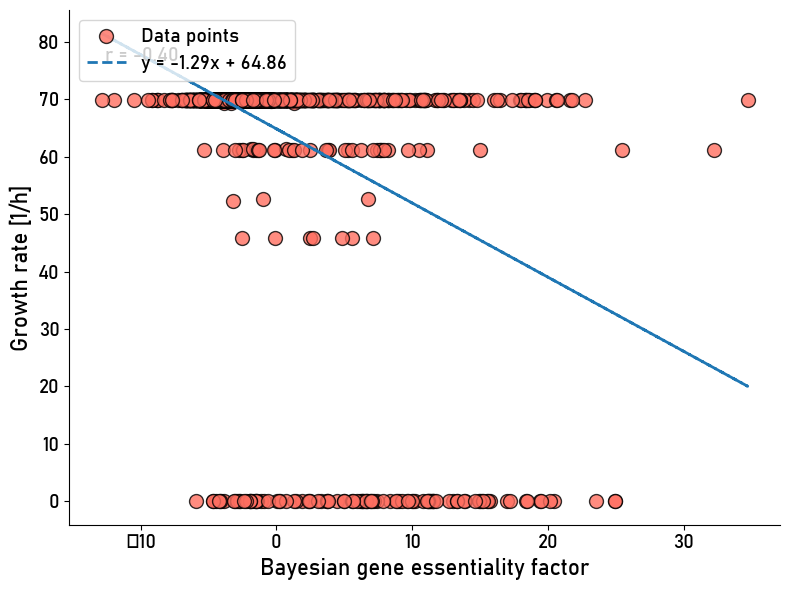

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


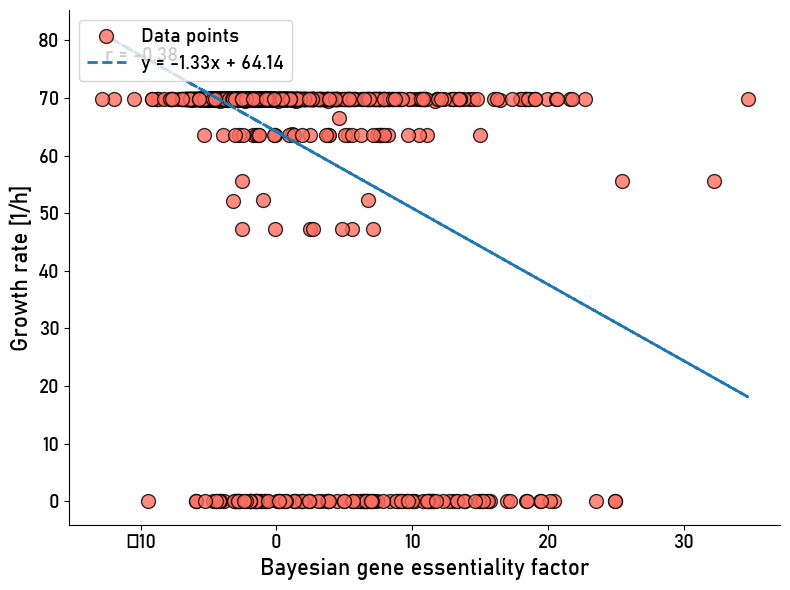

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


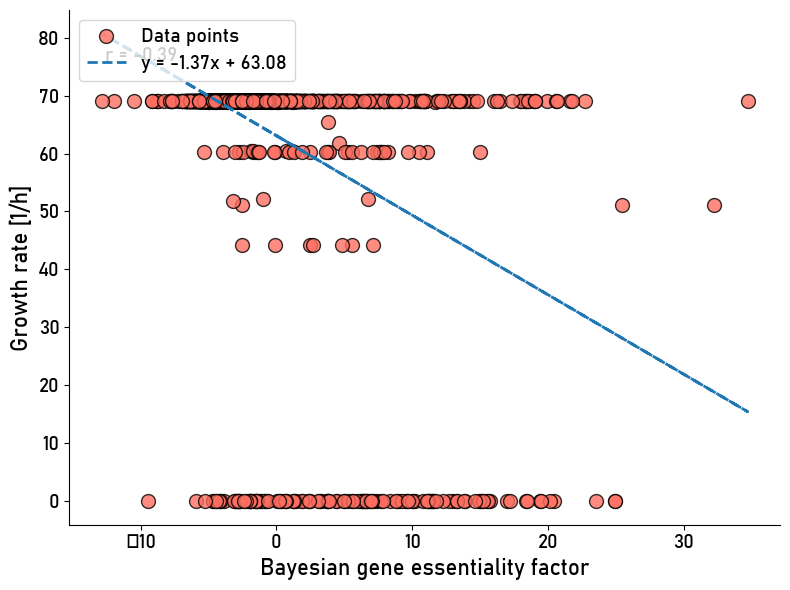

C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.tight_layout()
C:\Users\phili\AppData\Local\Temp\ipykernel_35200\614666212.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  plt.savefig("scatter_regression_plot.svg")
c:\Users\phili\anaconda3\envs\context_GEM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Bahnschrift.
  fig.canvas.print_figure(bytes_io, **kw)


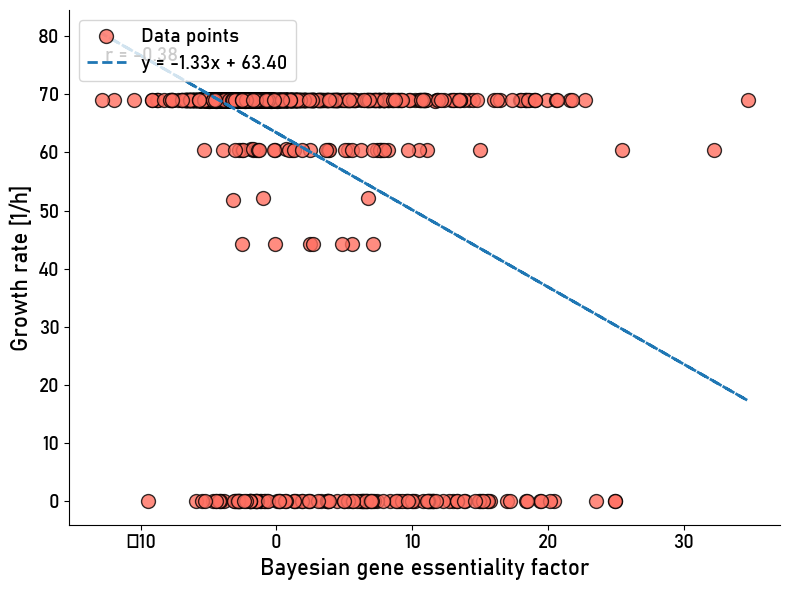

In [22]:
# checking for possible negative linear relationship between growth rate and Bayesian gene essentiality factor
# since both values can be used to assign discret categories, but are still continous numbers, 
# a linear relationship could be possible that lays extra emphasis on genes that are for example less 
# essential but still impact cell viability to some degree and are shown to decrease flux in the simulation
from scipy.stats import linregress

for mdl_name in mdl_list:

    sub_df = df_essentiality.loc[df_essentiality[f"in_model_{mdl_name}"] == True, ["gene_essentiality", f"fba_solution_{mdl_name}"]].rename(columns={f"fba_solution_{mdl_name}": "fba_solution"})

    # Example datasets (replace these with your actual data)
    x = sub_df["gene_essentiality"]
    y = sub_df["fba_solution"]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Scatter plot
    ax.scatter(x, y, color="#FF6F61", edgecolor="black", s=100, label="Data points", alpha=0.8)

    # Regression line
    ax.plot(x, regression_line, color="#1f77b4", linestyle="--", linewidth=2, label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Correlation coefficient text
    ax.text(0.05, 0.9, f"r = {r_value:.2f}", transform=ax.transAxes, fontsize=14, fontweight="bold", color="black")

    # Labels and styling
    ax.set_xlabel("Bayesian gene essentiality factor", fontsize=16, fontname="Bahnschrift")
    ax.set_ylabel("Growth rate [1/h]", fontsize=16, fontname="Bahnschrift")
    ax.tick_params(axis='both', labelsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Legend
    ax.legend(fontsize=14, loc="upper left")

    # Layout and save
    plt.tight_layout()
    plt.show()

